In [3]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import utils as utils
# Set my plot theme
# See here for more detials
# https://github.com/RishiSadhir/rethinking2/blob/master/utils/plotting.py
utils.set_theme()
COLOR = "#2A0933"

## 4.1 - Why normal distributions are normal

The normal distribution arrises in many many ways. 

**Python code 4.1 and figure 4.2**

One way it comes about is by adding distributions together. In fact, any process that adds together random values from teh same distribution converges to a normal distribution.

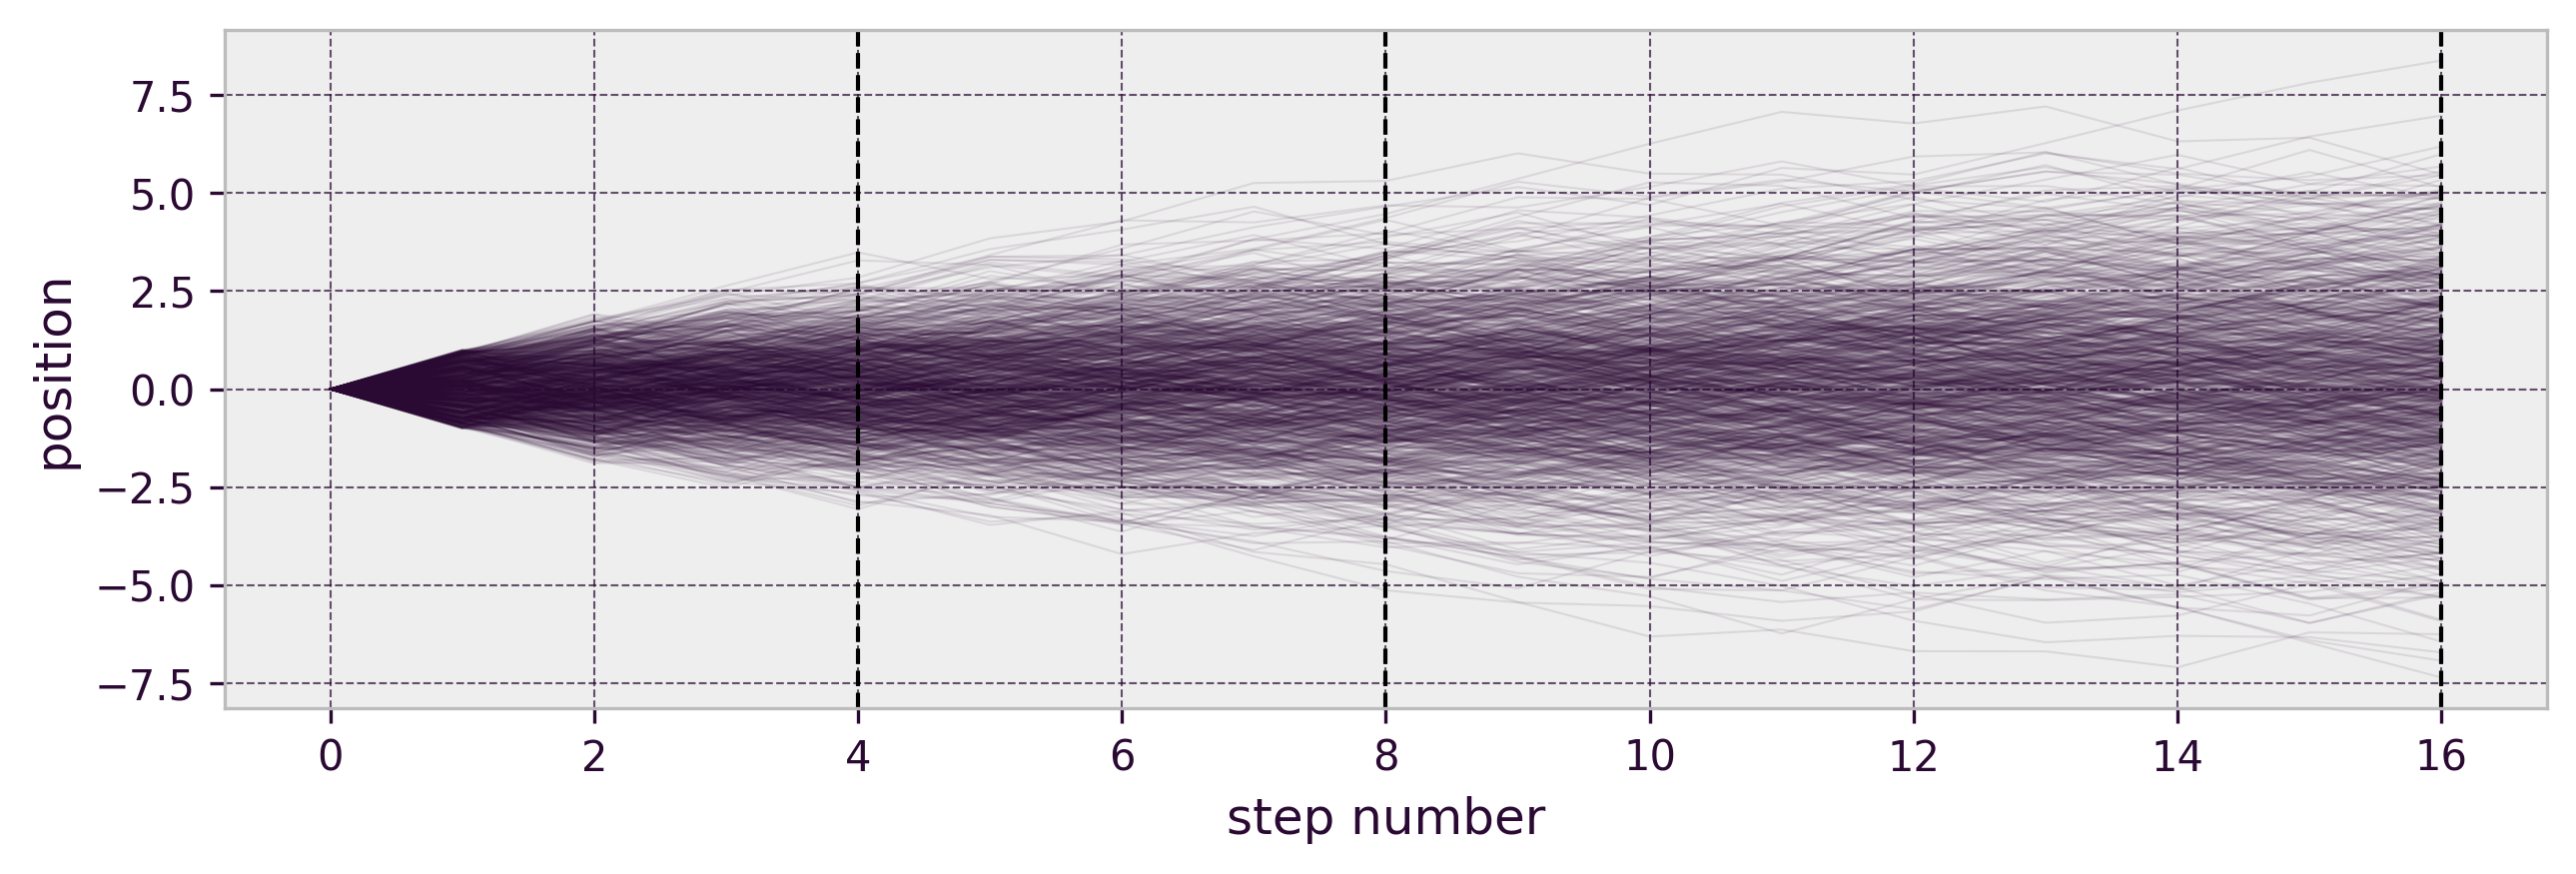

In [4]:
# Python code 4.1
n_steps = 16
n_people = 1000
pos = np.random.uniform(-1, 1, (n_people, n_steps))

# Figure 4.2.a
fig, ax = plt.subplots(figsize=(10,3))
ax.set_xlabel("step number")
ax.set_ylabel("position")
for person in range(n_people):
    x = np.arange(0, n_steps+1)
    y = np.cumsum(pos[person,:])
    y = np.insert(y, 0, 0., axis=0)
    ax.plot(x, y, color = COLOR, alpha = .1, linewidth=.5)
ax.axvline(x=4, linestyle='--', color = "black", linewidth = 1)
ax.axvline(x=8, linestyle='--', color = "black", linewidth = 1)
ax.axvline(x=16, linestyle='--', color = "black", linewidth = 1)
plt.show()

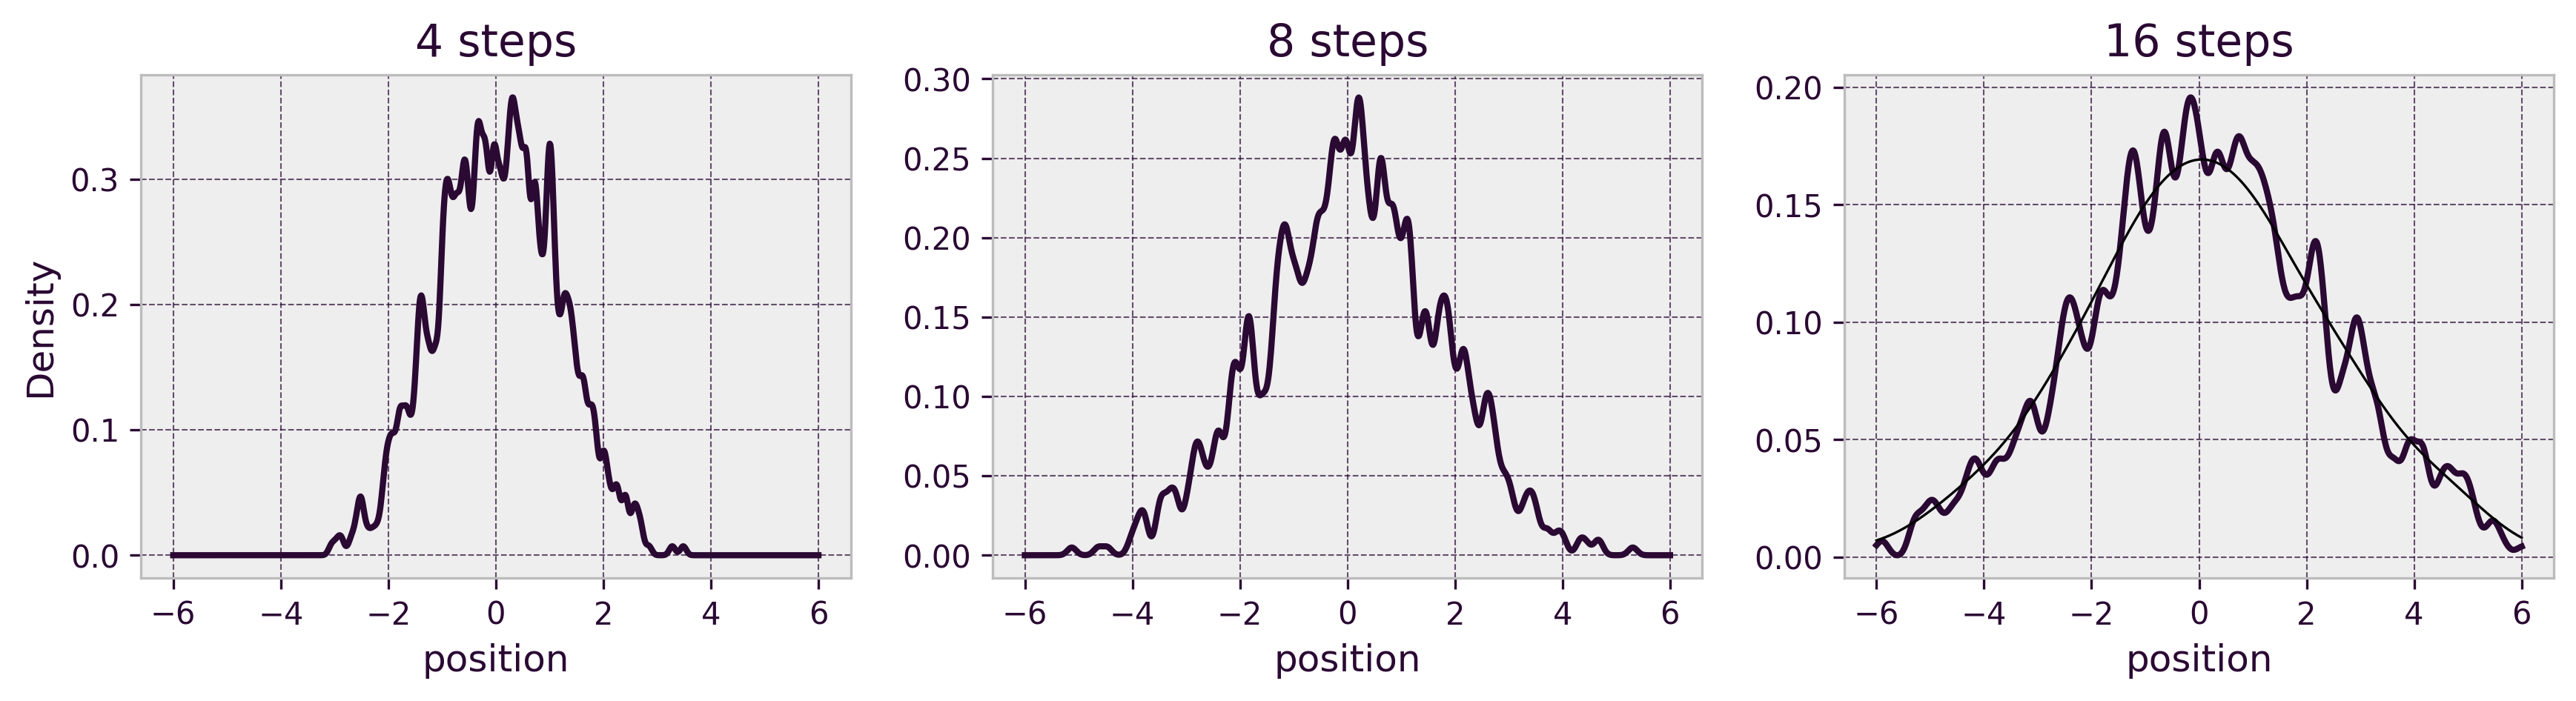

In [5]:
# Figure 4.2.b
fig, axes = plt.subplots(figsize=(14,3), ncols = 3)

x = np.linspace(-6, 6, 1000)

samples = np.apply_along_axis(np.sum, 1, pos[:,0:4])
axes[0].plot(x, utils.build_dens(samples, x, .05), color = COLOR)
axes[0].set_ylabel("Density")
axes[0].set_title("4 steps")
samples = np.apply_along_axis(np.sum, 1, pos[:,0:8])
axes[1].plot(x, utils.build_dens(samples, x, .05), color = COLOR)
axes[1].set_title("8 steps")
samples = np.apply_along_axis(np.sum, 1, pos[:,0:16])
axes[2].plot(x, utils.build_dens(samples, x, .05), color = COLOR)
axes[2].plot(x, utils.build_dens(samples, x, .3), color = "black", linewidth = .8)
axes[2].set_title("16 steps")
for i in [0,1,2]:
    axes[i].set_xlabel("position")
plt.show()

**Python code 4.2 to 4.5**

You really do just keep making normals as you combine distributions with themselves in different ways.

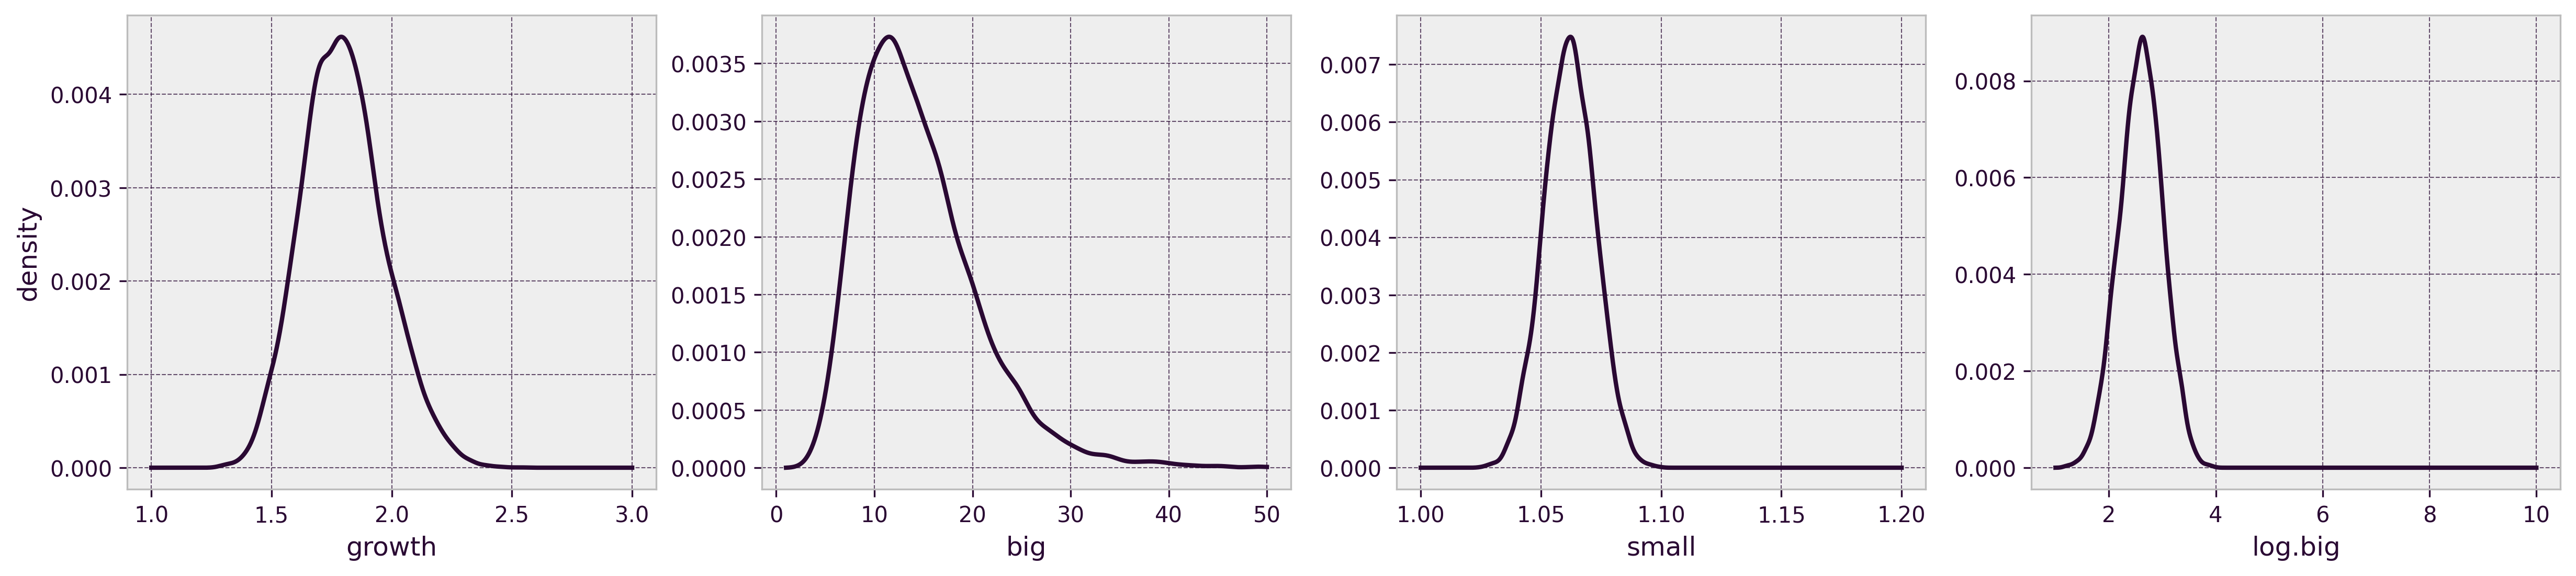

In [6]:
fig, axes = plt.subplots(figsize=(20, 4), ncols = 4)

# Python code 4.2 and 4.3
x = np.linspace(1, 3, 1000)
growth = 1 + np.random.uniform(0, .1, (10000, 12))
samples = np.apply_along_axis(np.prod, 1, growth)
axes[0].plot(x, utils.build_dens(samples, x, norm=True), color = COLOR)
axes[0].set_ylabel("density")
axes[0].set_xlabel("growth")

# Python code 4.4
x = np.linspace(1, 50, 1000)
growth = 1 + np.random.uniform(0, .5, (10000, 12))
samples = np.apply_along_axis(np.prod, 1, growth)
axes[1].plot(x, utils.build_dens(samples, x, norm=True), color = COLOR)
axes[1].set_xlabel("big")

x = np.linspace(1, 1.2, 1000)
growth = 1 + np.random.uniform(0, .01, (10000, 12))
samples = np.apply_along_axis(np.prod, 1, growth)
axes[2].plot(x, utils.build_dens(samples, x, norm=True), color = COLOR)
axes[2].set_xlabel("small")

# Pythong code 4.5
x = np.linspace(1, 10, 1000)
growth = 1 + np.random.uniform(0, .5, (10000, 12))
samples = np.apply_along_axis(np.prod, 1, growth)
samples = np.log(samples)
axes[3].plot(x, utils.build_dens(samples, x, norm=True), color = COLOR)
axes[3].set_xlabel("log.big")

plt.show()

## 4.2 - A language for describing models

To train our first model, we'll load up the !Kung San dataset.
**Python code 4.7 to 4.11**

In [7]:
d = utils.data_from_R("Howell1", "rethinking")
d2 = d[d['age'] >= 18]
d2.describe()

height      weight         age        male
count  352.000000  352.000000  352.000000  352.000000
mean   154.597093   44.990486   41.138494    0.468750
std      7.742332    6.456708   15.967855    0.499733
min    136.525000   31.071052   18.000000    0.000000
25%    148.590000   40.256290   28.000000    0.000000
50%    154.305000   44.792210   39.000000    0.000000
75%    160.655000   49.292693   51.000000    1.000000
max    179.070000   62.992589   88.000000    1.000000

We're going to train a model of human height. Lets start with a prior predictive check.

**Python code 4.12 to Python code 4.14 and figure 4.3**

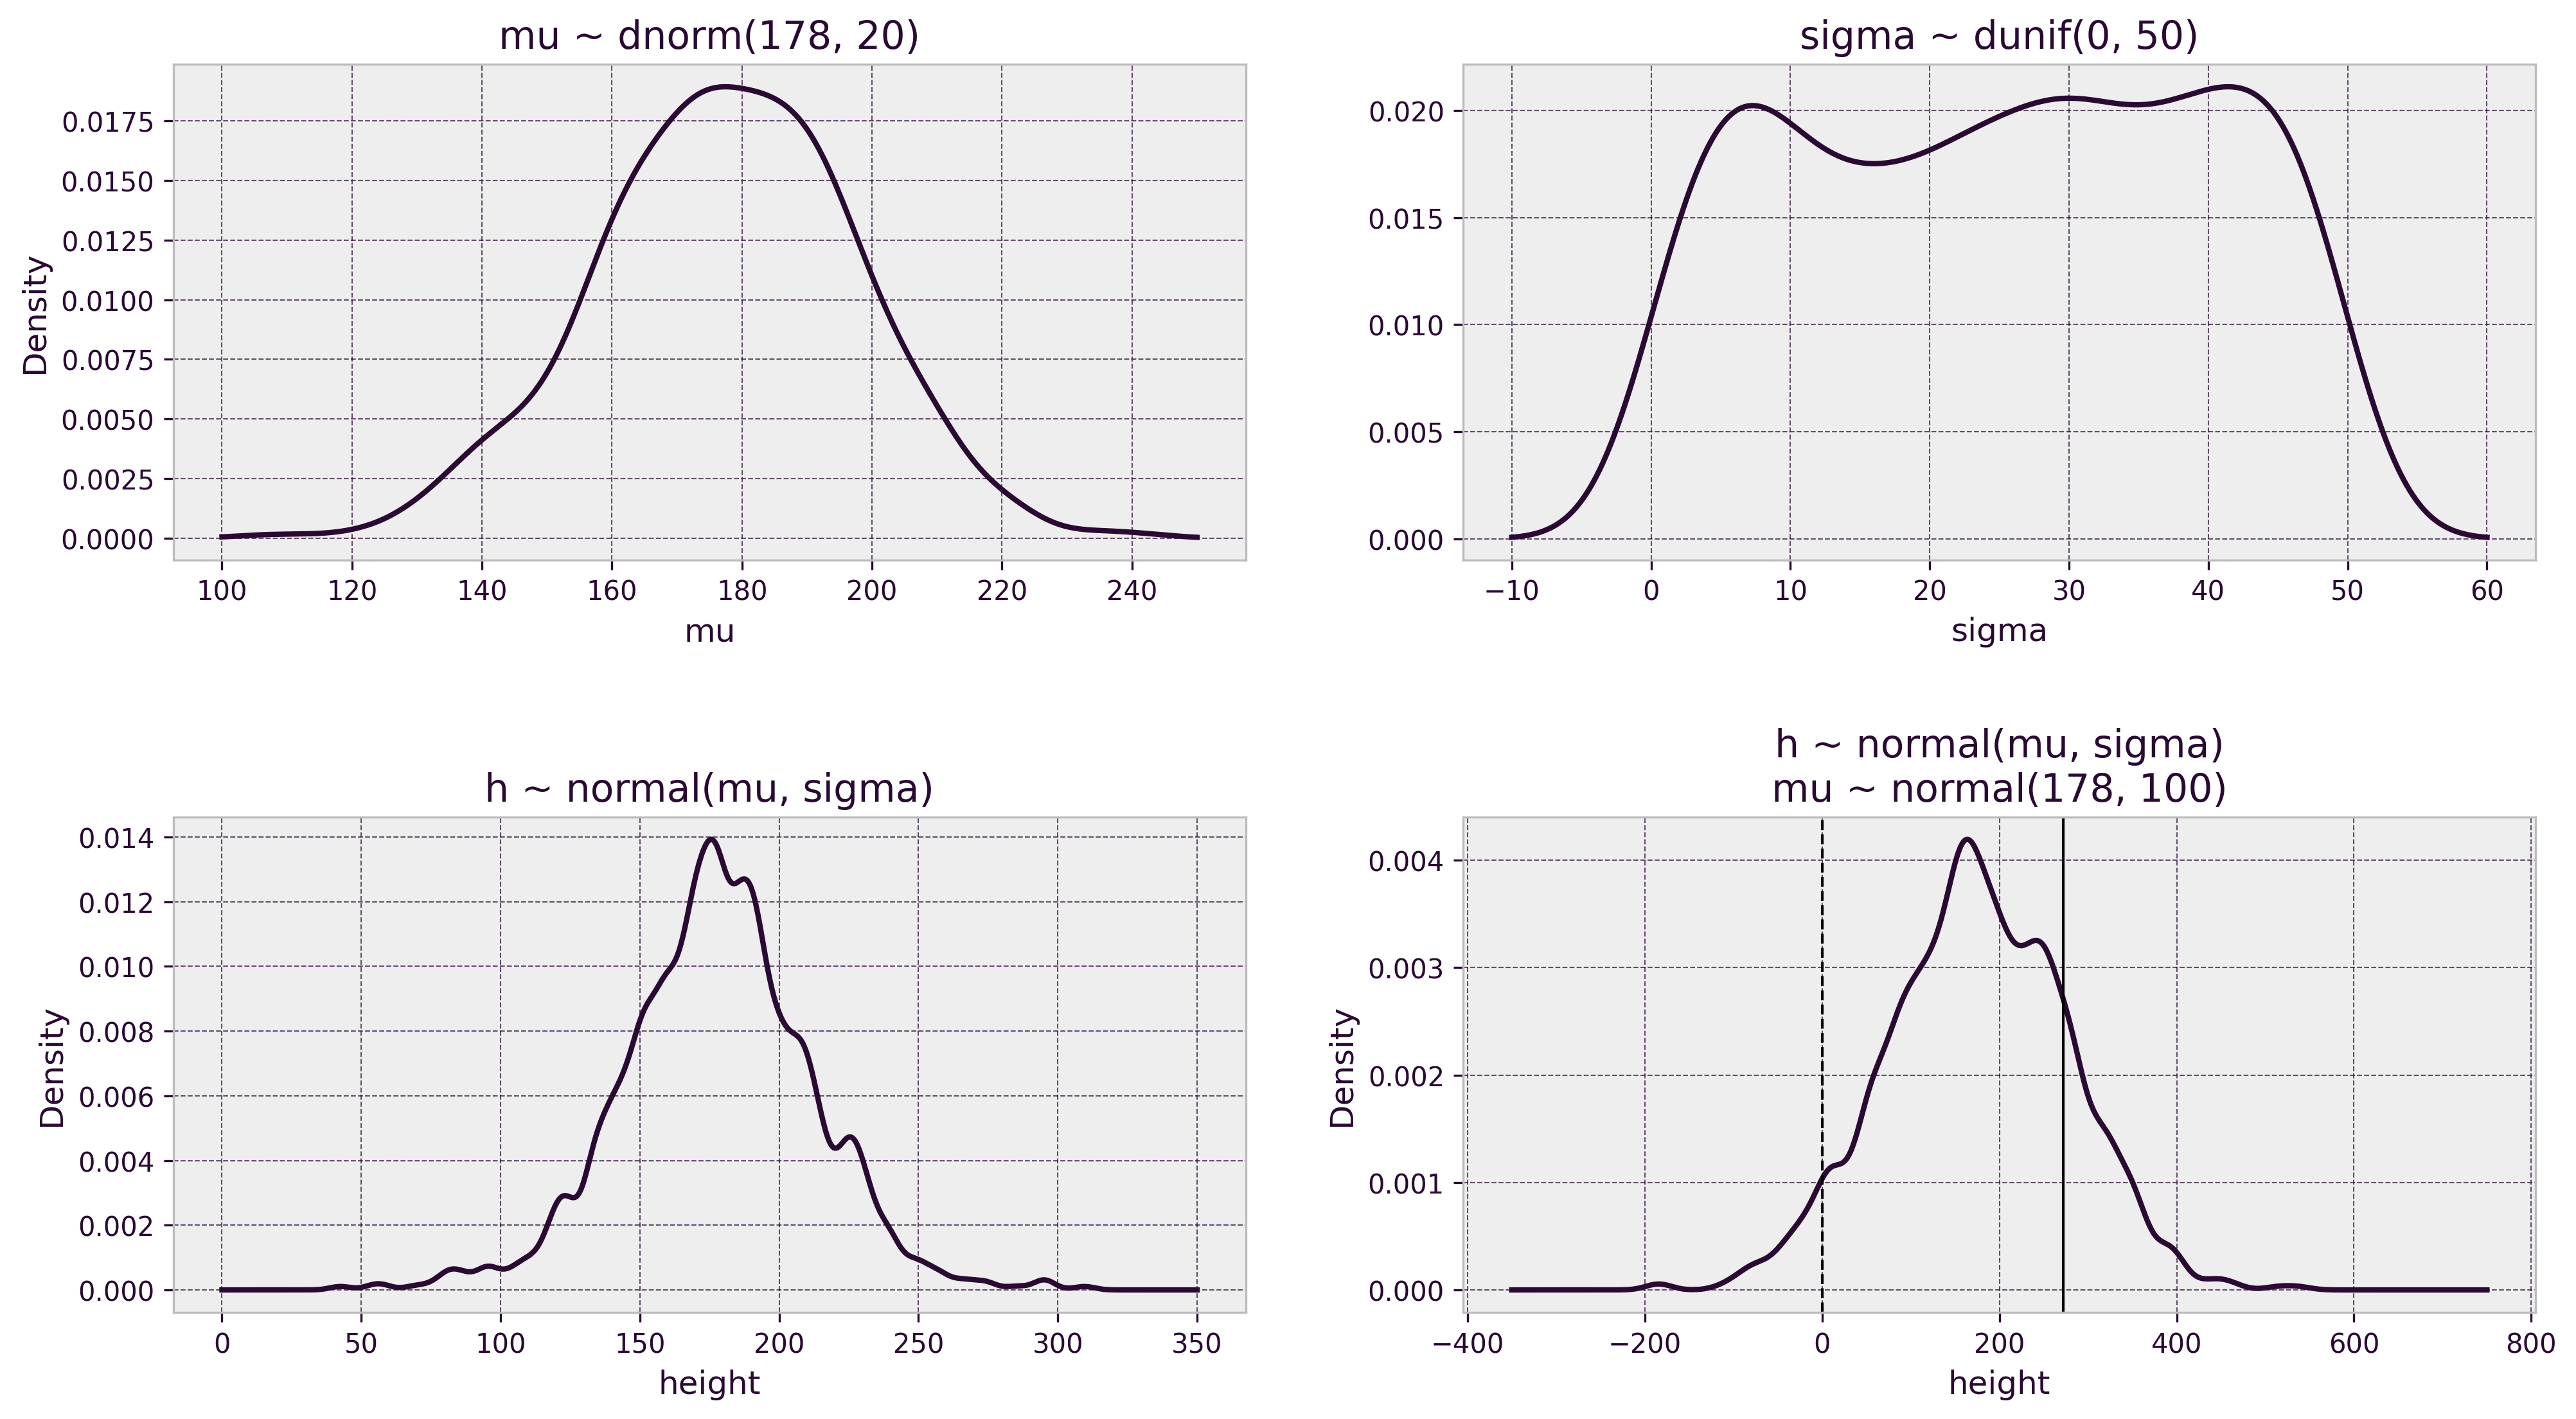

In [8]:
fig, axes = plt.subplots(figsize=(14, 8), ncols = 2, nrows = 2)

# Python code 4.12
x = np.linspace(100, 250, 1000)
mu = stats.norm.rvs(178, 20, 1000)
y = utils.build_dens(mu, x)
axes[0, 0].plot(x, y, color = COLOR)
axes[0, 0].set_xlabel("mu")
axes[0, 0].set_ylabel("Density")
axes[0, 0].set_title("mu ~ dnorm(178, 20)")

# Python code 4.13
x = np.linspace(-10, 60, 1000)
sigma = stats.uniform.rvs(0, 50, 1000)
y = utils.build_dens(sigma, x, .25)
axes[0, 1].plot(x, y, color = COLOR)
axes[0, 1].set_xlabel("sigma")
axes[0, 1].set_title("sigma ~ dunif(0, 50)")

# Python code 4.14
x = np.linspace(0, 350, 1000)
prior_h = stats.norm.rvs(mu, sigma, 1000)
y = utils.build_dens(prior_h, x, .11)
axes[1, 0].plot(x, y, color = COLOR)
axes[1, 0].set_xlabel("height")
axes[1, 0].set_ylabel("Density")
axes[1, 0].set_title("h ~ normal(mu, sigma)")

# Python code 4.15
x = np.linspace(-350, 750, 1000)
mu = stats.norm.rvs(178, 100, 1000)
prior_h = stats.norm.rvs(mu, sigma, 1000)
y = utils.build_dens(prior_h, x, .14)
axes[1,1].plot(x, y, color = COLOR)
axes[1,1].set_xlabel("height")
axes[1,1].set_ylabel("Density")
axes[1,1].set_title("h ~ normal(mu, sigma)\nmu ~ normal(178, 100)")

# Figure 4.3
axes[1, 1].axvline(x=0, linestyle='--', color = "black", linewidth = 1)
axes[1, 1].axvline(x=272, color = "black", linewidth = 1)

fig.tight_layout(pad=3.0)
plt.show()

**Python code 4.16 to 4.18**

We start by training a model of human height via grid approximation. There are two parameters here so things are a bit more complicated. First we calculate the log-likelihood of each parameter combination. Then we add the priors. I emphasize add because we are in log space. Then we `exp` back in to probability space.

In [9]:
mu_list = np.linspace(150, 160, 200)
sigma_list = np.linspace(4, 9, 200)
post = np.array([(x, y) for x in mu_list for y in sigma_list])

post = pd.DataFrame({
    "mu": post[:,0],
    "sigma": post[:,1]
})

def find_ll(moments, y):
    vec = stats.norm.logpdf(y, moments[0], moments[1])
    return np.sum(vec)

post["LL"] = post.apply(find_ll, 1, args=[d2['height']])

post["prod"] = post["LL"] + \
    stats.norm.logpdf(post['mu'], 178, 20) + \
    stats.uniform.logpdf(post['sigma'], 0, 50)

post['prob'] = np.exp(post['prod'] - max(post['prod']))

post.describe()

mu         sigma            LL          prod           prob
count  40000.000000  40000.000000  40000.000000  40000.000000   4.000000e+04
mean     155.000000      6.500000  -1307.904590  -1316.403056   1.505148e-02
std        2.901258      1.450629     94.315976     94.299550   8.537704e-02
min      150.000000      4.000000  -1790.055005  -1798.286698  1.958497e-248
25%      152.500000      5.250000  -1345.266676  -1353.755305   2.235936e-55
50%      155.000000      6.500000  -1272.814725  -1281.337678   6.310012e-24
75%      157.500000      7.750000  -1239.504583  -1248.001447   1.895712e-09
max      160.000000      9.000000  -1219.407716  -1227.917773   1.000000e+00

**Python code 4.19 to 4.2 and figure 4.4**

Now lets sample from the posterior and plot the joint distribution.

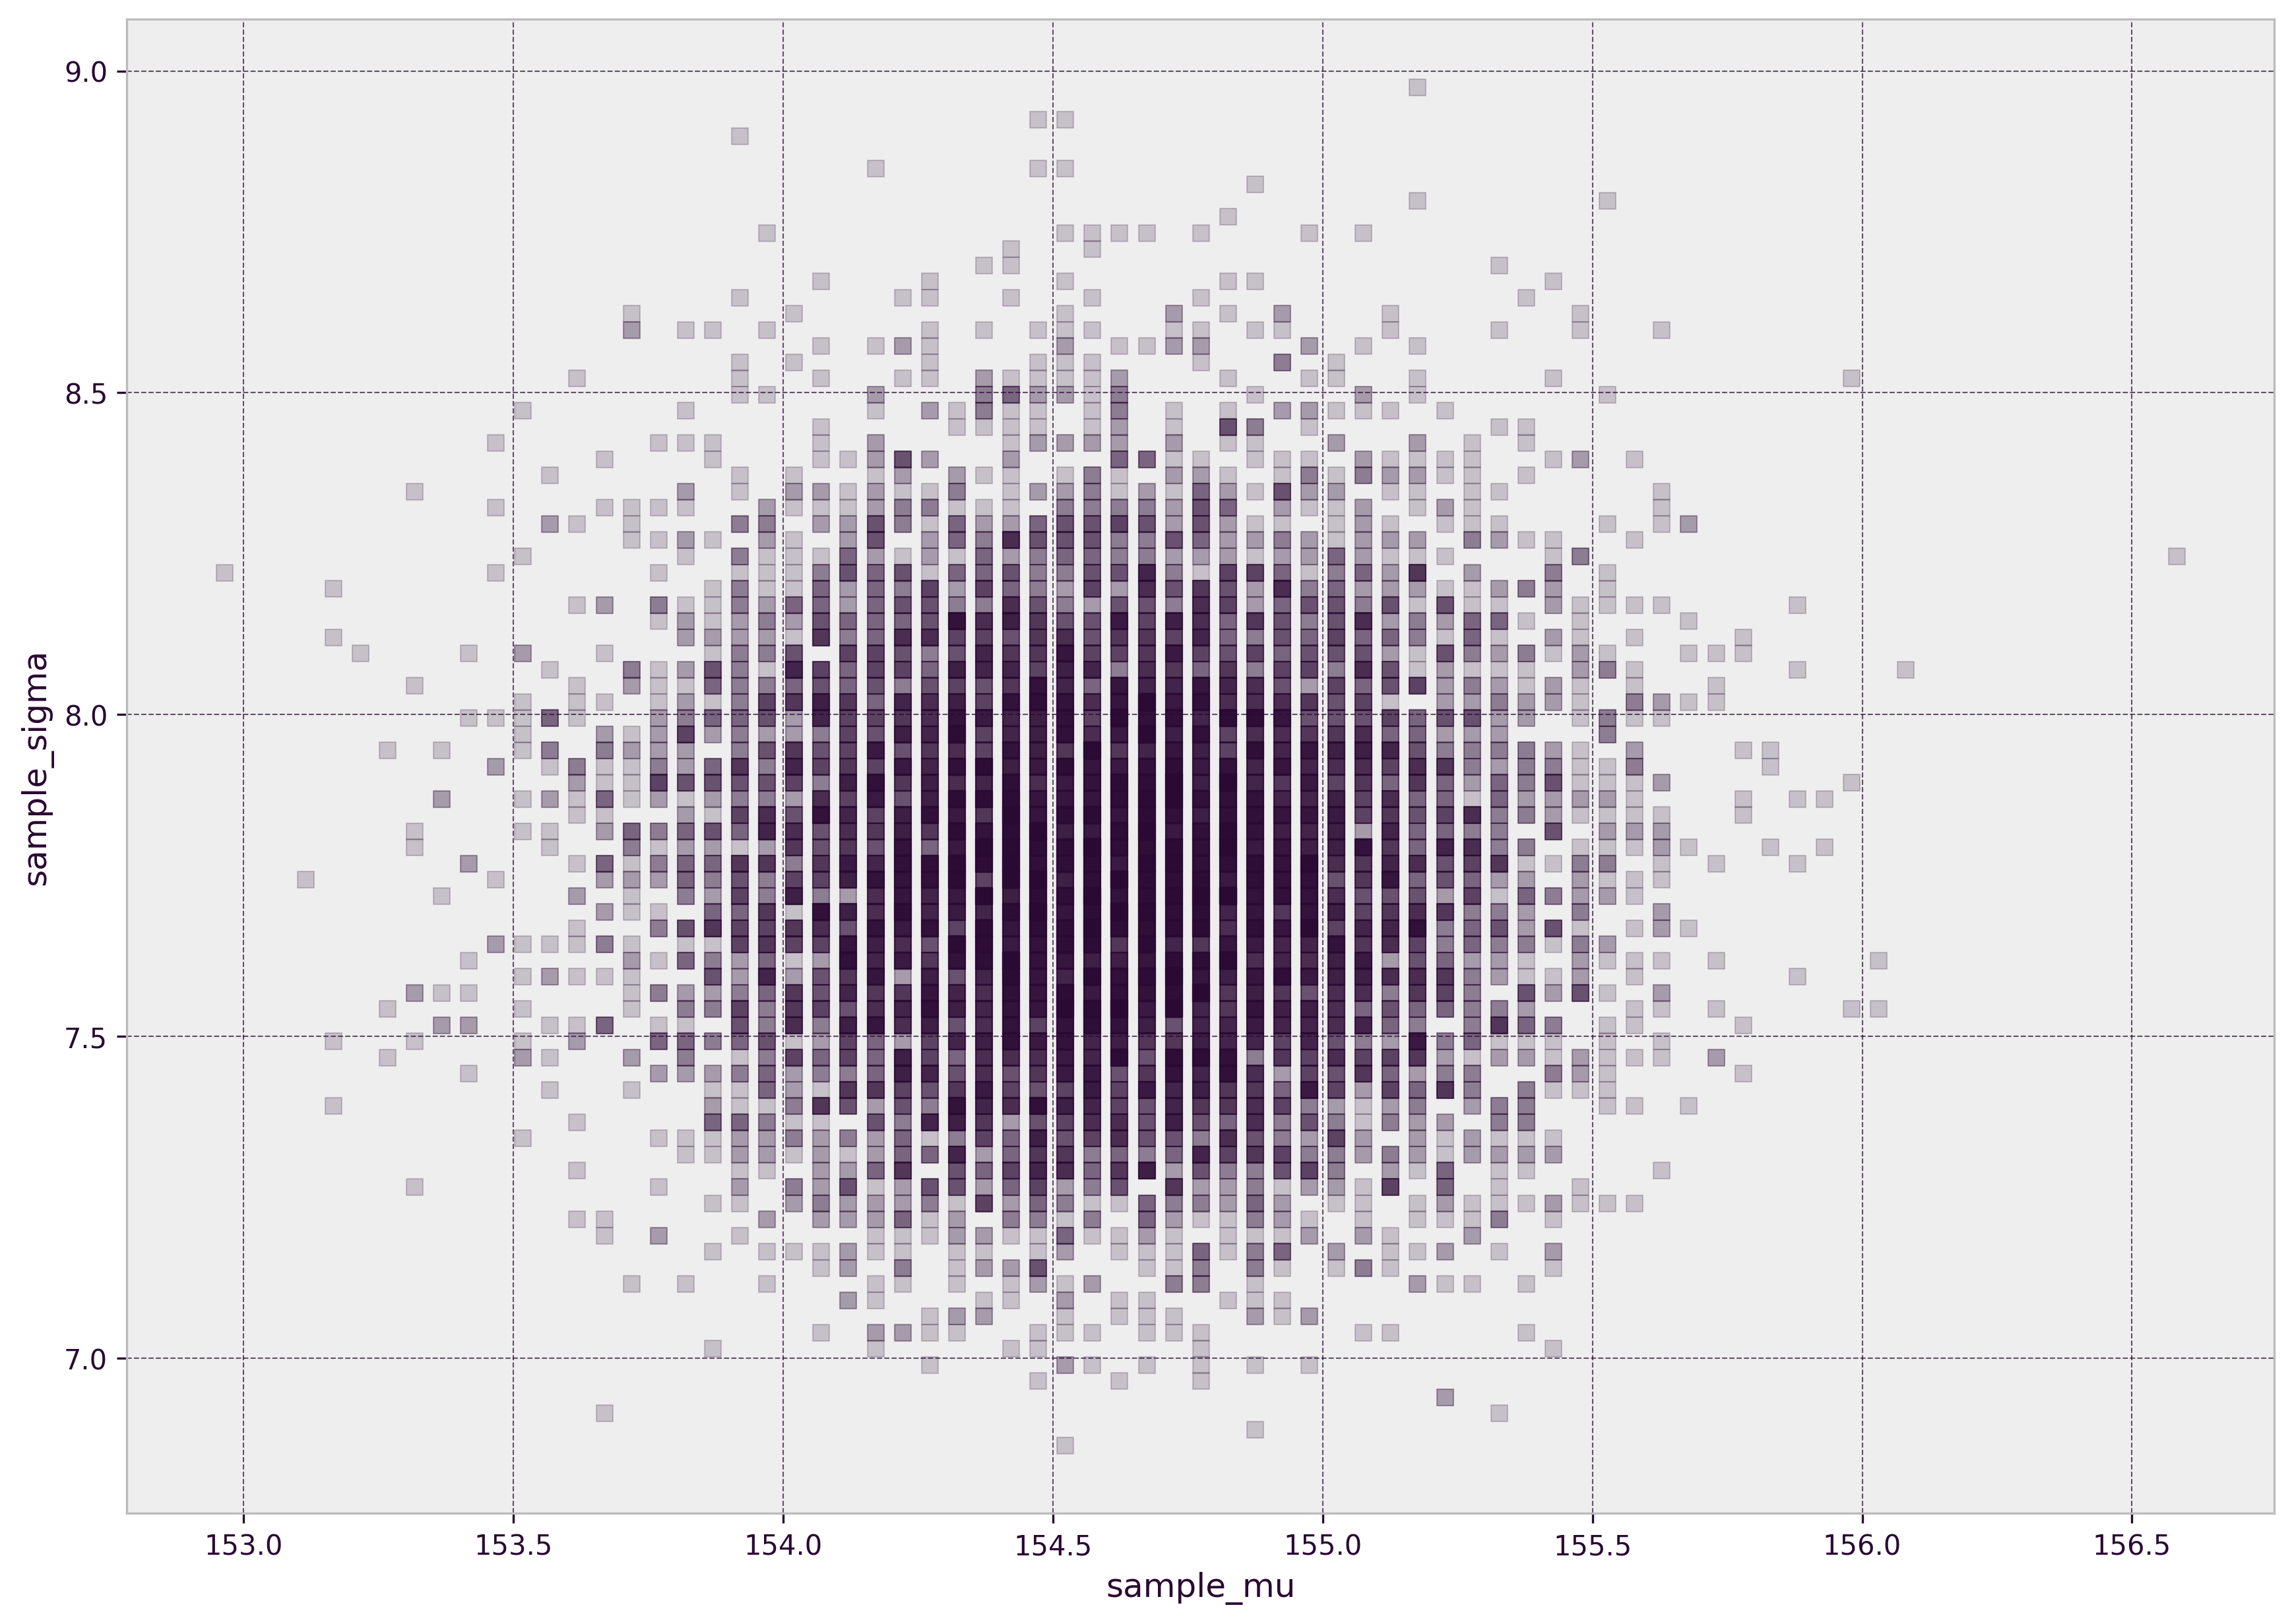

In [10]:
prob = post['prob'].values / np.sum(post['prob'].values)
sample_rows = np.random.choice(np.arange(len(post)), size = 10000, replace=True, p=prob).tolist()
sample_mu = post['mu'][sample_rows]
sample_sigma = post['sigma'][sample_rows]
fig, ax = plt.subplots(figsize=(14,10))
ax.scatter(sample_mu, sample_sigma, alpha = .2, marker='s', color=COLOR)
ax.set_xlabel("sample_mu")
ax.set_ylabel("sample_sigma")
plt.show()

**Python code 4.21 and 4.22**

We can also examine the marginal distributions.

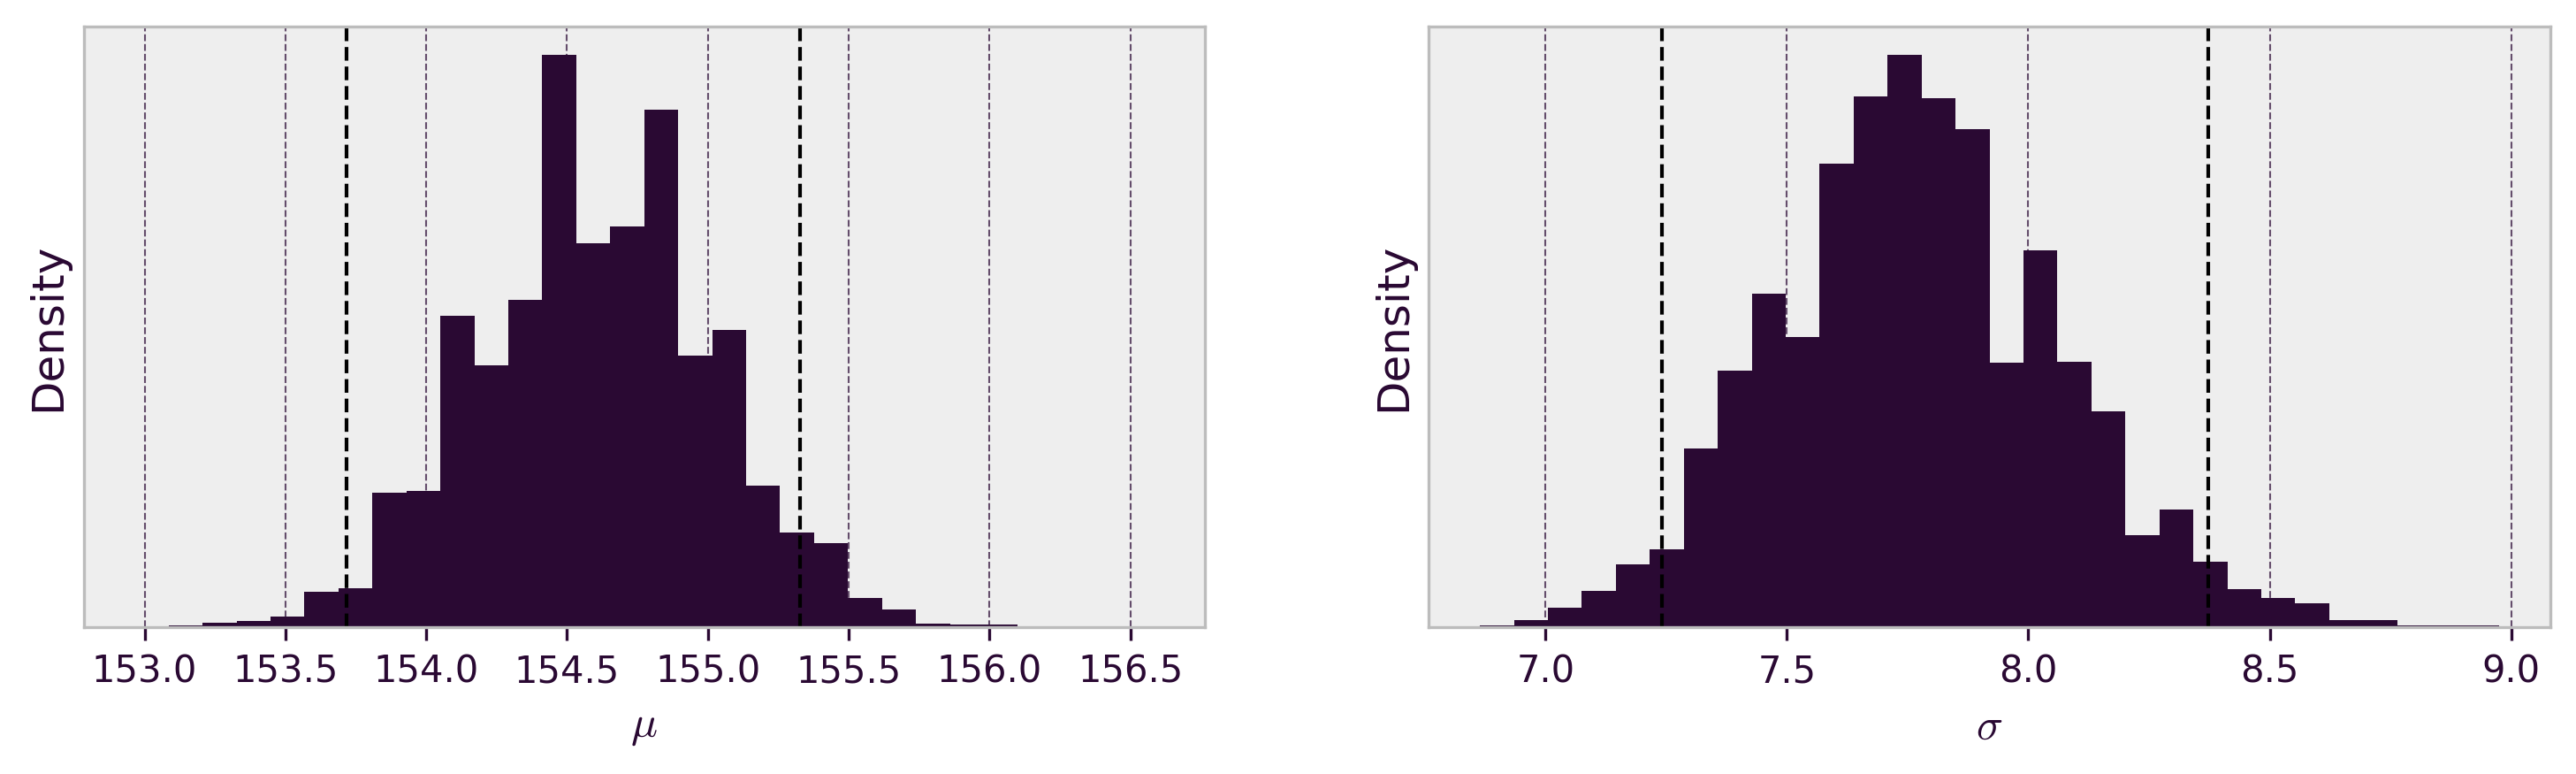

In [11]:
mu_low, mu_high = utils.hpdi(sample_mu)
sigma_low, sigma_high = utils.hpdi(sample_sigma)
fig, axes = plt.subplots(figsize=(12, 3), ncols=2)
axes[0].axvline(x=mu_low, color = "black", linewidth=1, linestyle="--")
axes[0].axvline(x=mu_high, color = "black", linewidth=1, linestyle="--")
axes[0].hist(sample_mu, bins = 30, color=COLOR)
axes[0].set_xlabel("$\mu$")
axes[0].set_ylabel("Density")
axes[0].set_yticks([])
axes[1].axvline(x=sigma_low, color = "black", linewidth=1, linestyle="--")
axes[1].axvline(x=sigma_high, color = "black", linewidth=1, linestyle="--")
axes[1].hist(sample_sigma, bins = 30, color=COLOR)
axes[1].set_xlabel("$\sigma$")
axes[1].set_ylabel("Density")
axes[1].set_yticks([])
plt.show()

At this point in the book, we leave our old friend grid approximation behind and we're _supposed_ to move on to quadratic approximation. We're actually going to blow right through that and use PyStan and MCMC directly. Why? Because the models in this stage of the book aren't complex enough for any of MCMC's ugly complexities to rear their head.

In [12]:
import pystan as ps

In [13]:
%load_ext stanmagic

**Python code 4.31 to 4.35**

Lets build our first model!

\begin{align}
h_i &\sim Normal(\mu, \sigma) \\
\mu &\sim Normal(178, 20) \\
\sigma &\sim Uniform(0, 50)
\end{align}

In [14]:
%%stan -v m4_2
data {
  int N;
  vector[N] height;
}
parameters {
  real mu;
  real<lower=0> sigma;
}
model {
  mu ~ normal(178, 20);
  sigma ~ normal(178, 20);
  height ~ normal(mu, sigma);
}

Using pystan.stanc compiler..
-------------------------------------------------------------------------------
Model compiled successfully. Output stored in m4_2 object.
Type m4_2 in a cell to see a nicely formatted code output in a notebook
     ^^^^
Access model compile output properties
m4_2.model_file -> Name of stan_file [None]
m4_2.model_name -> Name of stan model [None]
m4_2.model_code -> Model code [data {   int N;   ve ....]


In [15]:
height = d2['height'].tolist()
d_dict = {"N": len(height), "height":height}
sm = ps.StanModel(model_code=m4_2.model_code)
fit = sm.sampling(data=d_dict, chains=4, n_jobs=4, refresh = 0)
print(fit.stansummary(probs=[.055, .945]))

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_54a4dd4d4bf2a0193533490f1260a632 NOW.


Inference for Stan model: anon_model_54a4dd4d4bf2a0193533490f1260a632.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

        mean se_mean     sd   5.5%  94.5%  n_eff   Rhat
mu    154.61  7.5e-3   0.42 153.94 155.29   3120    1.0
sigma   7.81  5.2e-3    0.3   7.35   8.31   3261    1.0
lp__  -931.8    0.02   1.01 -933.7 -930.8   1785    1.0

Samples were drawn using NUTS at Thu 02 Apr 2020 11:35:22 PM .
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


We can look at the variance-covariance matrix implied by the posterior distribution.

In [16]:
post = fit.extract(["mu", "sigma"])
np.cov(np.array([post['mu'], post['sigma']]))

array([[0.17579305, 0.00031674],
       [0.00031674, 0.08824577]])

## 4.4 - Linear Prediction

We're going to add a predictor to our linear regression -- weight (x). 

**Python code 4.37**

Here is the model we're going to train.

\begin{align}
h_i &\sim Normal(\mu_i, \sigma) & \text{[likelihood]} \\
\mu_i &= \alpha + \beta(x_i - \bar{x}) & \text{[linear model]} \\
\alpha &\sim Normal(178, 20) & \text{[} \alpha \text{ prior]} \\
\beta &\sim Normal(0, 10) & \text{[} \beta\text{ prior]} \\
\sigma &\sim Uniform(0, 50) & \text{[} \sigma\text{ prior]} \\
\end{align}

Lets plot the relationship first though.

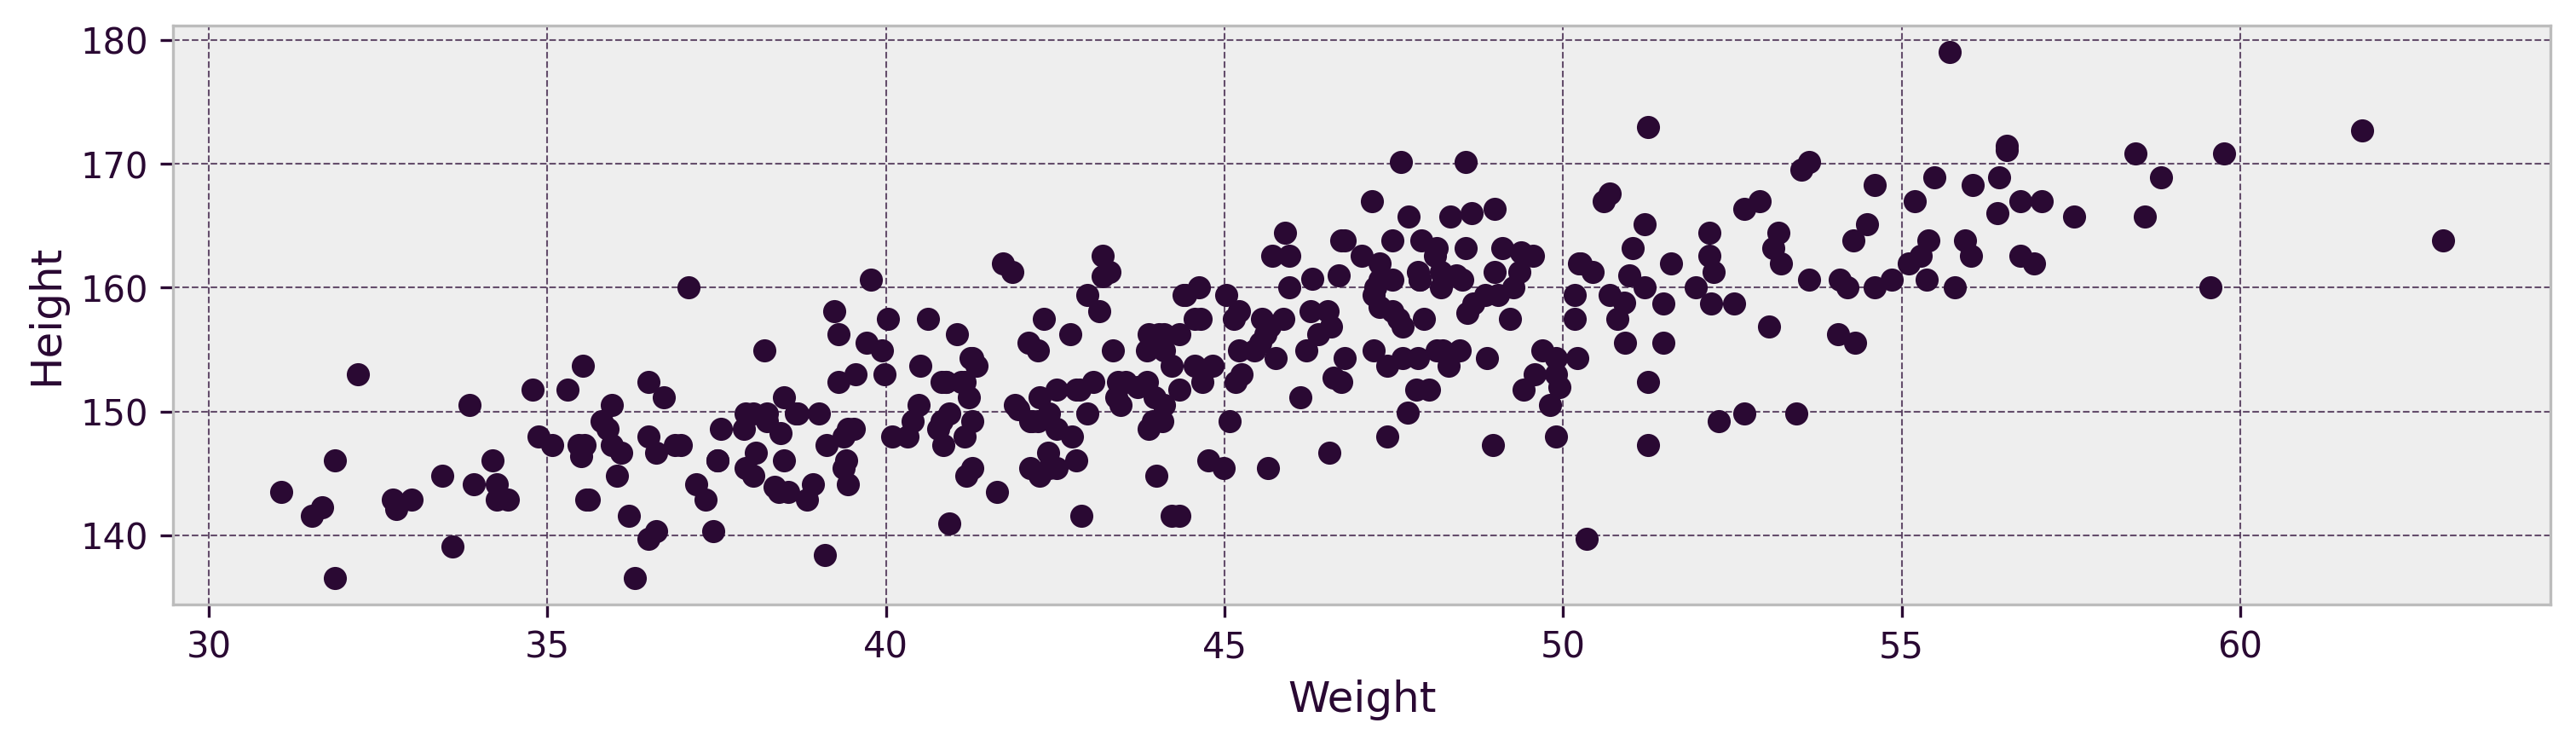

In [17]:
fig, ax = plt.subplots(figsize=(12, 3))
ax.scatter(d2['weight'], d2['height'], color = COLOR)
ax.set_xlabel("Weight")
ax.set_ylabel("Height")
plt.show()

**Python code 4.38 to 4.41**

Next, lets check out those priors with a prior predictive simulation.

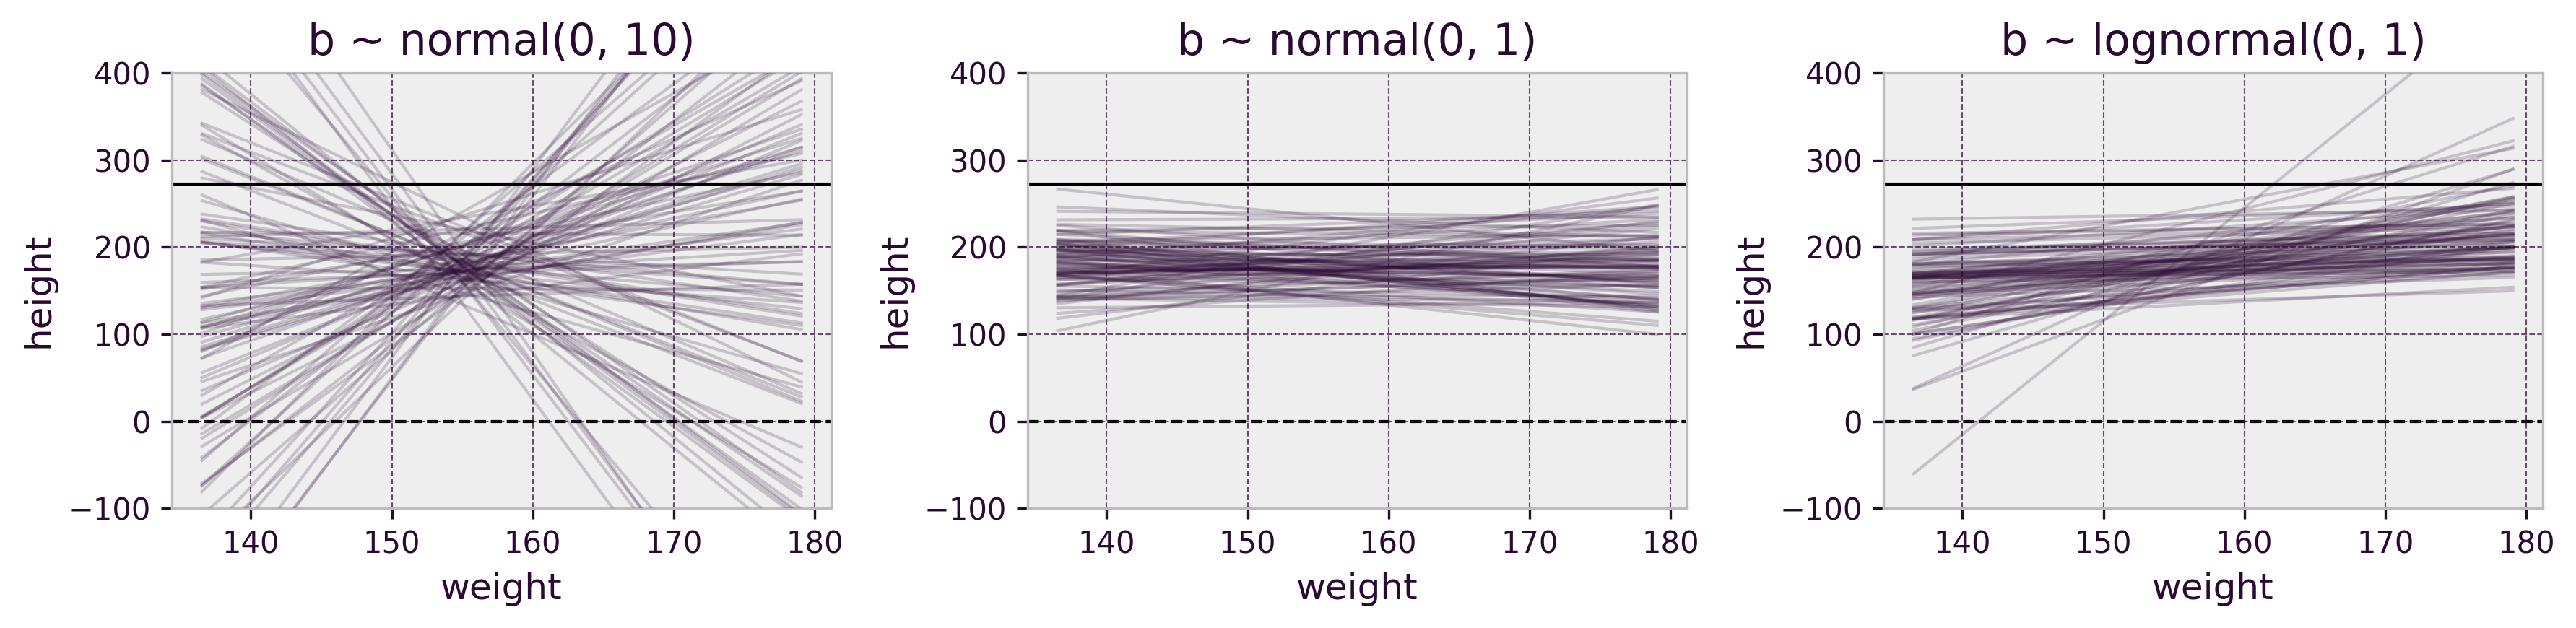

In [18]:
N=100
a = stats.norm.rvs(178, 20, N)
b = stats.norm.rvs(0, 10, N)

fig, axes = plt.subplots(figsize=(12, 3), ncols=3)

xseq = np.linspace(min(d2['height']), max(d2['height']), 1000)
xbar = np.mean(d2['height'])
for i in range(100):
    y = a[i] + b[i]*(xseq - xbar)
    axes[0].plot(xseq, y, color = COLOR, alpha = .2, linewidth = 1, zorder=10)
axes[0].axhline(0, color = "black", linewidth = 1, linestyle="--", zorder=1)
axes[0].axhline(272, color = "black", linewidth = 1, zorder=1)
axes[0].set_yticks([-100, 0, 100, 200, 300, 400])
axes[0].set_ylim([-100, 400])
axes[0].set_xlabel("weight")
axes[0].set_ylabel("height")
axes[0].set_title("b ~ normal(0, 10)")

b = stats.norm.rvs(0, 1, N)

for i in range(100):
    y = a[i] + b[i]*(xseq - xbar)
    axes[1].plot(xseq, y, color = COLOR, alpha = .2, linewidth = 1, zorder=10)
axes[1].axhline(0, color = "black", linewidth = 1, linestyle="--", zorder=1)
axes[1].axhline(272, color = "black", linewidth = 1, zorder=1)
axes[1].set_yticks([-100, 0, 100, 200, 300, 400])
axes[1].set_ylim([-100, 400])
axes[1].set_xlabel("weight")
axes[1].set_ylabel("height")
axes[1].set_title("b ~ normal(0, 1)")

b = stats.lognorm.rvs(1, 0, 1, N)

for i in range(100):
    y = a[i] + b[i]*(xseq - xbar)
    axes[2].plot(xseq, y, color = COLOR, alpha = .2, linewidth = 1, zorder=10)
axes[2].axhline(0, color = "black", linewidth = 1, linestyle="--", zorder=1)
axes[2].axhline(272, color = "black", linewidth = 1, zorder=1)
axes[2].set_yticks([-100, 0, 100, 200, 300, 400])
axes[2].set_ylim([-100, 400])
axes[2].set_xlabel("weight")
axes[2].set_ylabel("height")
axes[2].set_title("b ~ lognormal(0, 1)")

plt.tight_layout()

plt.show()

Finally, lets find the posterior. We'll go with the lognormal model:

\begin{align}
h_i &\sim Normal(\mu_i, \sigma) & \text{[likelihood]} \\
\mu_i &= \alpha + \beta(x_i - \bar{x}) & \text{[linear model]} \\
\alpha &\sim Normal(178, 20) & \text{[} \alpha \text{ prior]} \\
\beta &\sim Lognormal(0, 1) & \text{[} \beta\text{ prior]} \\
\sigma &\sim Uniform(0, 50) & \text{[} \sigma\text{ prior]} \\
\end{align}

**Python code 4.42 to 4.45**


In [19]:
%%stan -v m4_3
data {
  int N;
  vector[N] height;
  vector[N] weight;
}
transformed data {
  real wbar;
  wbar = mean(weight);
}
parameters {
    real alpha;
    real<lower=0> beta;
    real<lower=0,upper=50> sigma;
}
model {
  sigma ~ uniform( 0 , 50 );
  beta ~ lognormal( 0 , 1 );
  alpha ~ normal( 178 , 20 );
  
  height ~ normal(alpha + beta*(weight - wbar), sigma );
}

Using pystan.stanc compiler..
-------------------------------------------------------------------------------
Model compiled successfully. Output stored in m4_3 object.
Type m4_3 in a cell to see a nicely formatted code output in a notebook
     ^^^^
Access model compile output properties
m4_3.model_file -> Name of stan_file [None]
m4_3.model_name -> Name of stan model [None]
m4_3.model_code -> Model code [data {   int N;   ve ....]


In [20]:
d_dict = {
    "N": len(d2.index), 
    "height": d2['height'].tolist(),
    "weight": d2['weight'].tolist()
}

sm = ps.StanModel(model_code=m4_3.model_code)
fit = sm.sampling(data=d_dict, chains=4, n_jobs=4, refresh = 0)
print(fit.stansummary(probs=[.055, .945]))

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_d31e2fce98b50c2e10a37b6cb77b1366 NOW.


Inference for Stan model: anon_model_d31e2fce98b50c2e10a37b6cb77b1366.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

        mean se_mean     sd   5.5%  94.5%  n_eff   Rhat
alpha 154.59  4.5e-3   0.28 154.15 155.04   3731    1.0
beta     0.9  6.7e-4   0.04   0.84   0.97   3995    1.0
sigma   5.11  3.2e-3    0.2   4.81   5.44   3781    1.0
lp__  -748.2    0.03   1.26 -750.6 -746.9   2096    1.0

Samples were drawn using NUTS at Thu 02 Apr 2020 11:36:00 PM .
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


In [21]:
post = fit.extract(['alpha', 'beta', 'sigma'])
np.cov([post['alpha'], post['beta'], post['sigma']])

array([[7.67737239e-02, 4.91983181e-04, 6.85017186e-04],
       [4.91983181e-04, 1.79316421e-03, 8.66767808e-05],
       [6.85017186e-04, 8.66767808e-05, 3.89491088e-02]])

Now that we've got tables out of the way, lets plot various summaries of our posterior distribution.

**Python code 4.4 and 4.47**

We'll start by just plotting the MAP values against actuals.

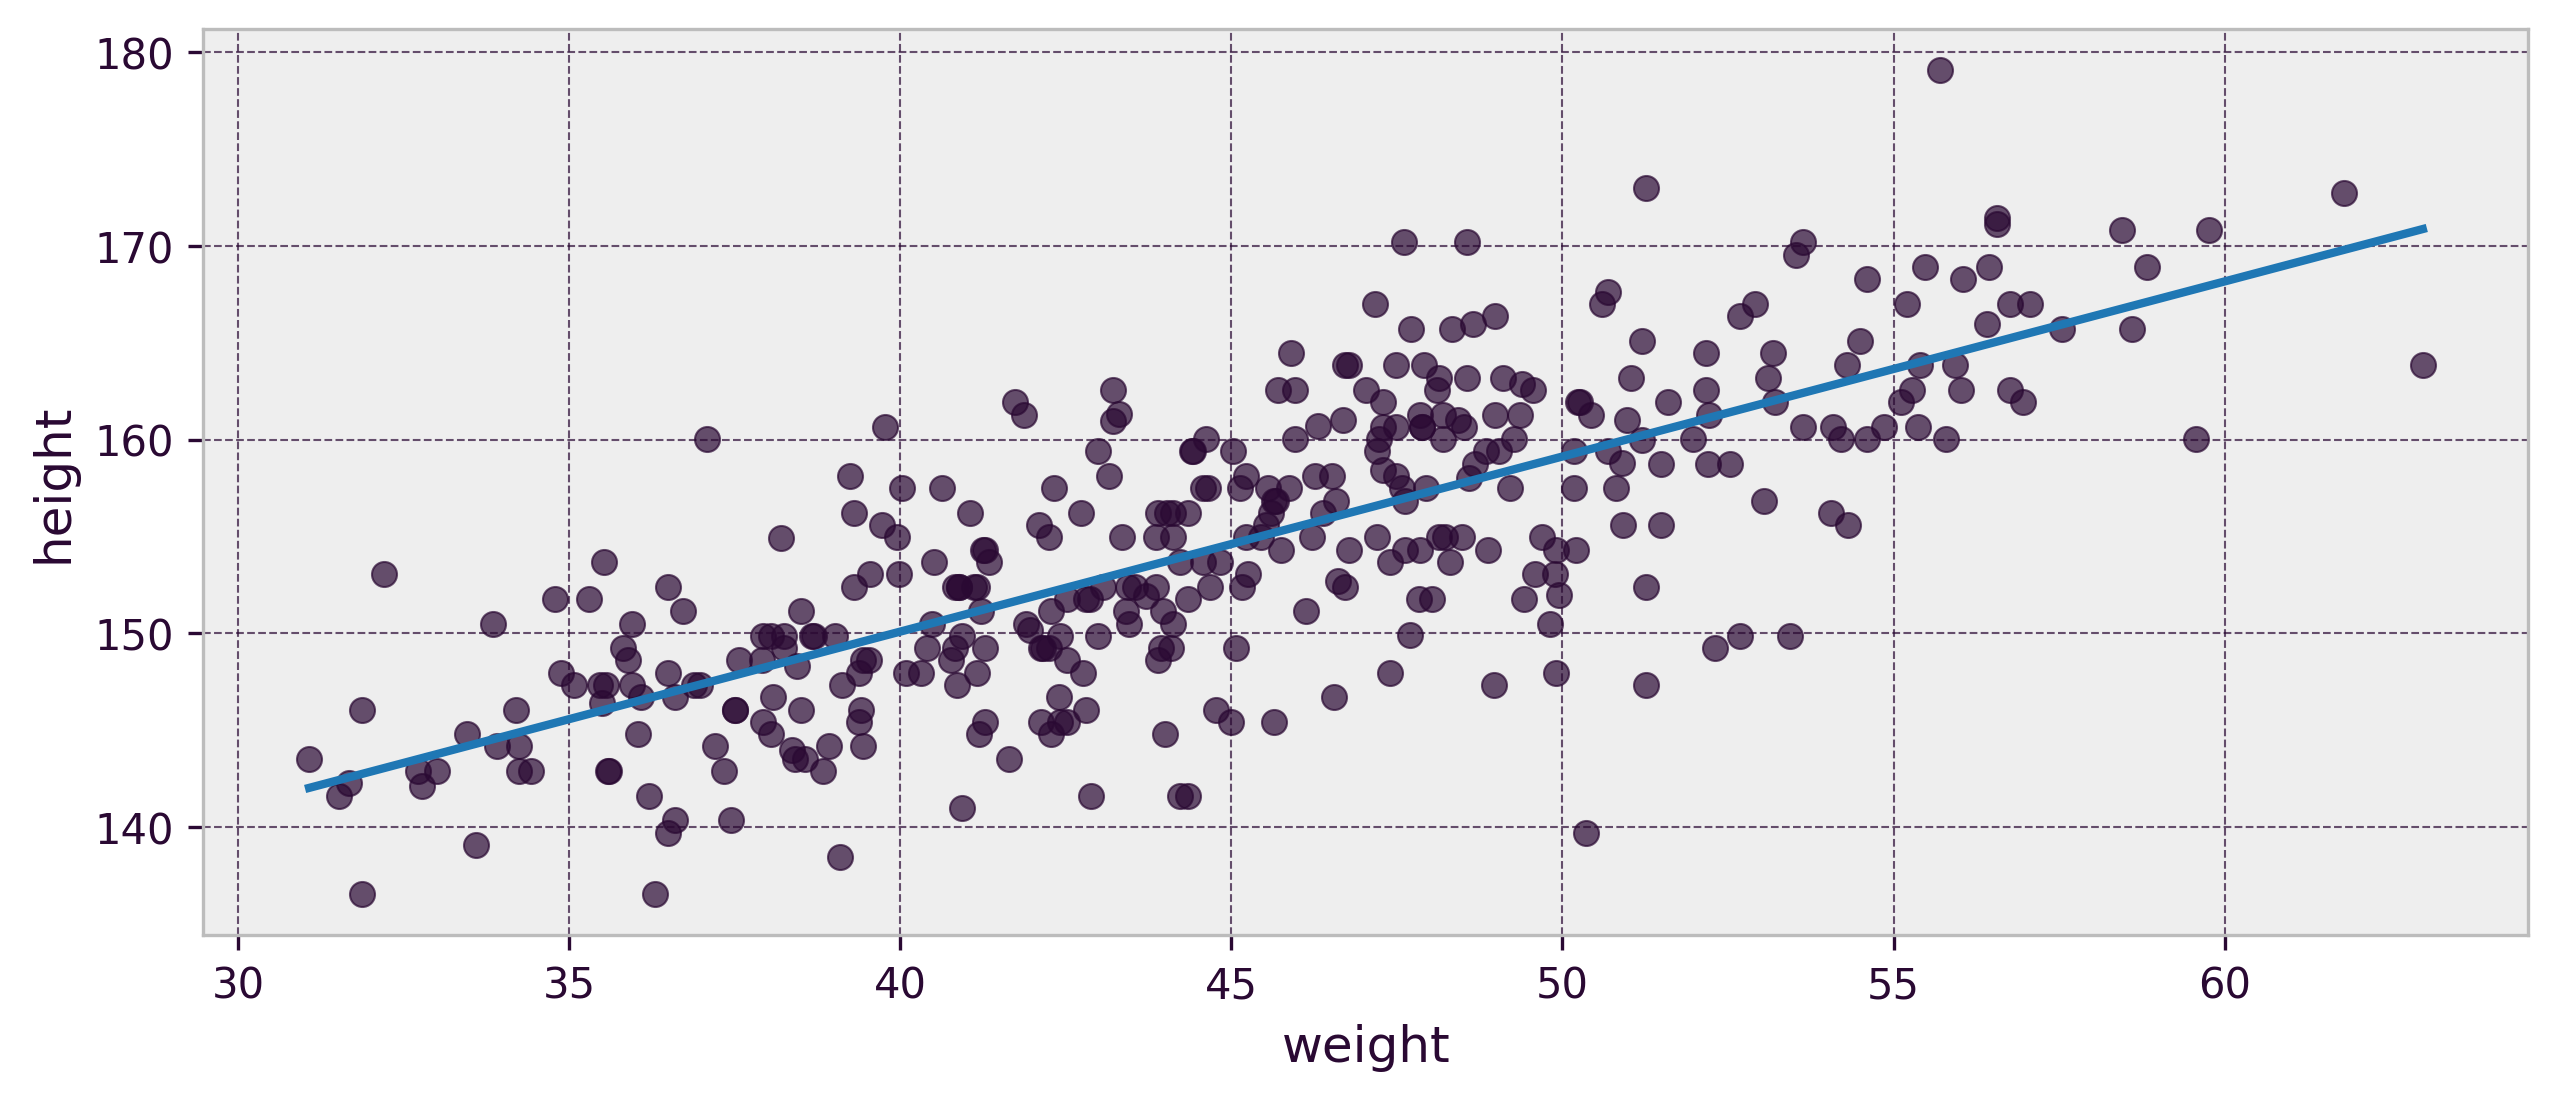

In [22]:
fig, ax = plt.subplots(figsize = (10, 4))
alpha = np.mean(post['alpha'])
beta = np.mean(post['beta'])
xseq = np.linspace(min(d2['weight']), max(d2['weight']), 1000)
ax.scatter(d2['weight'], d2['height'], alpha = .7, color = COLOR)
y = alpha + beta*(xseq - np.mean(d2['weight']))
ax.plot(xseq, y)
ax.set_xlabel("weight")
ax.set_ylabel("height")
plt.show()

**Python code 4.48 and 4.49 and figure 4.7**

Now we plot 20 random draws for the posterior distribution. We do this for times for different subsamples of the data to show how our uncertainty changes with how big our data is.

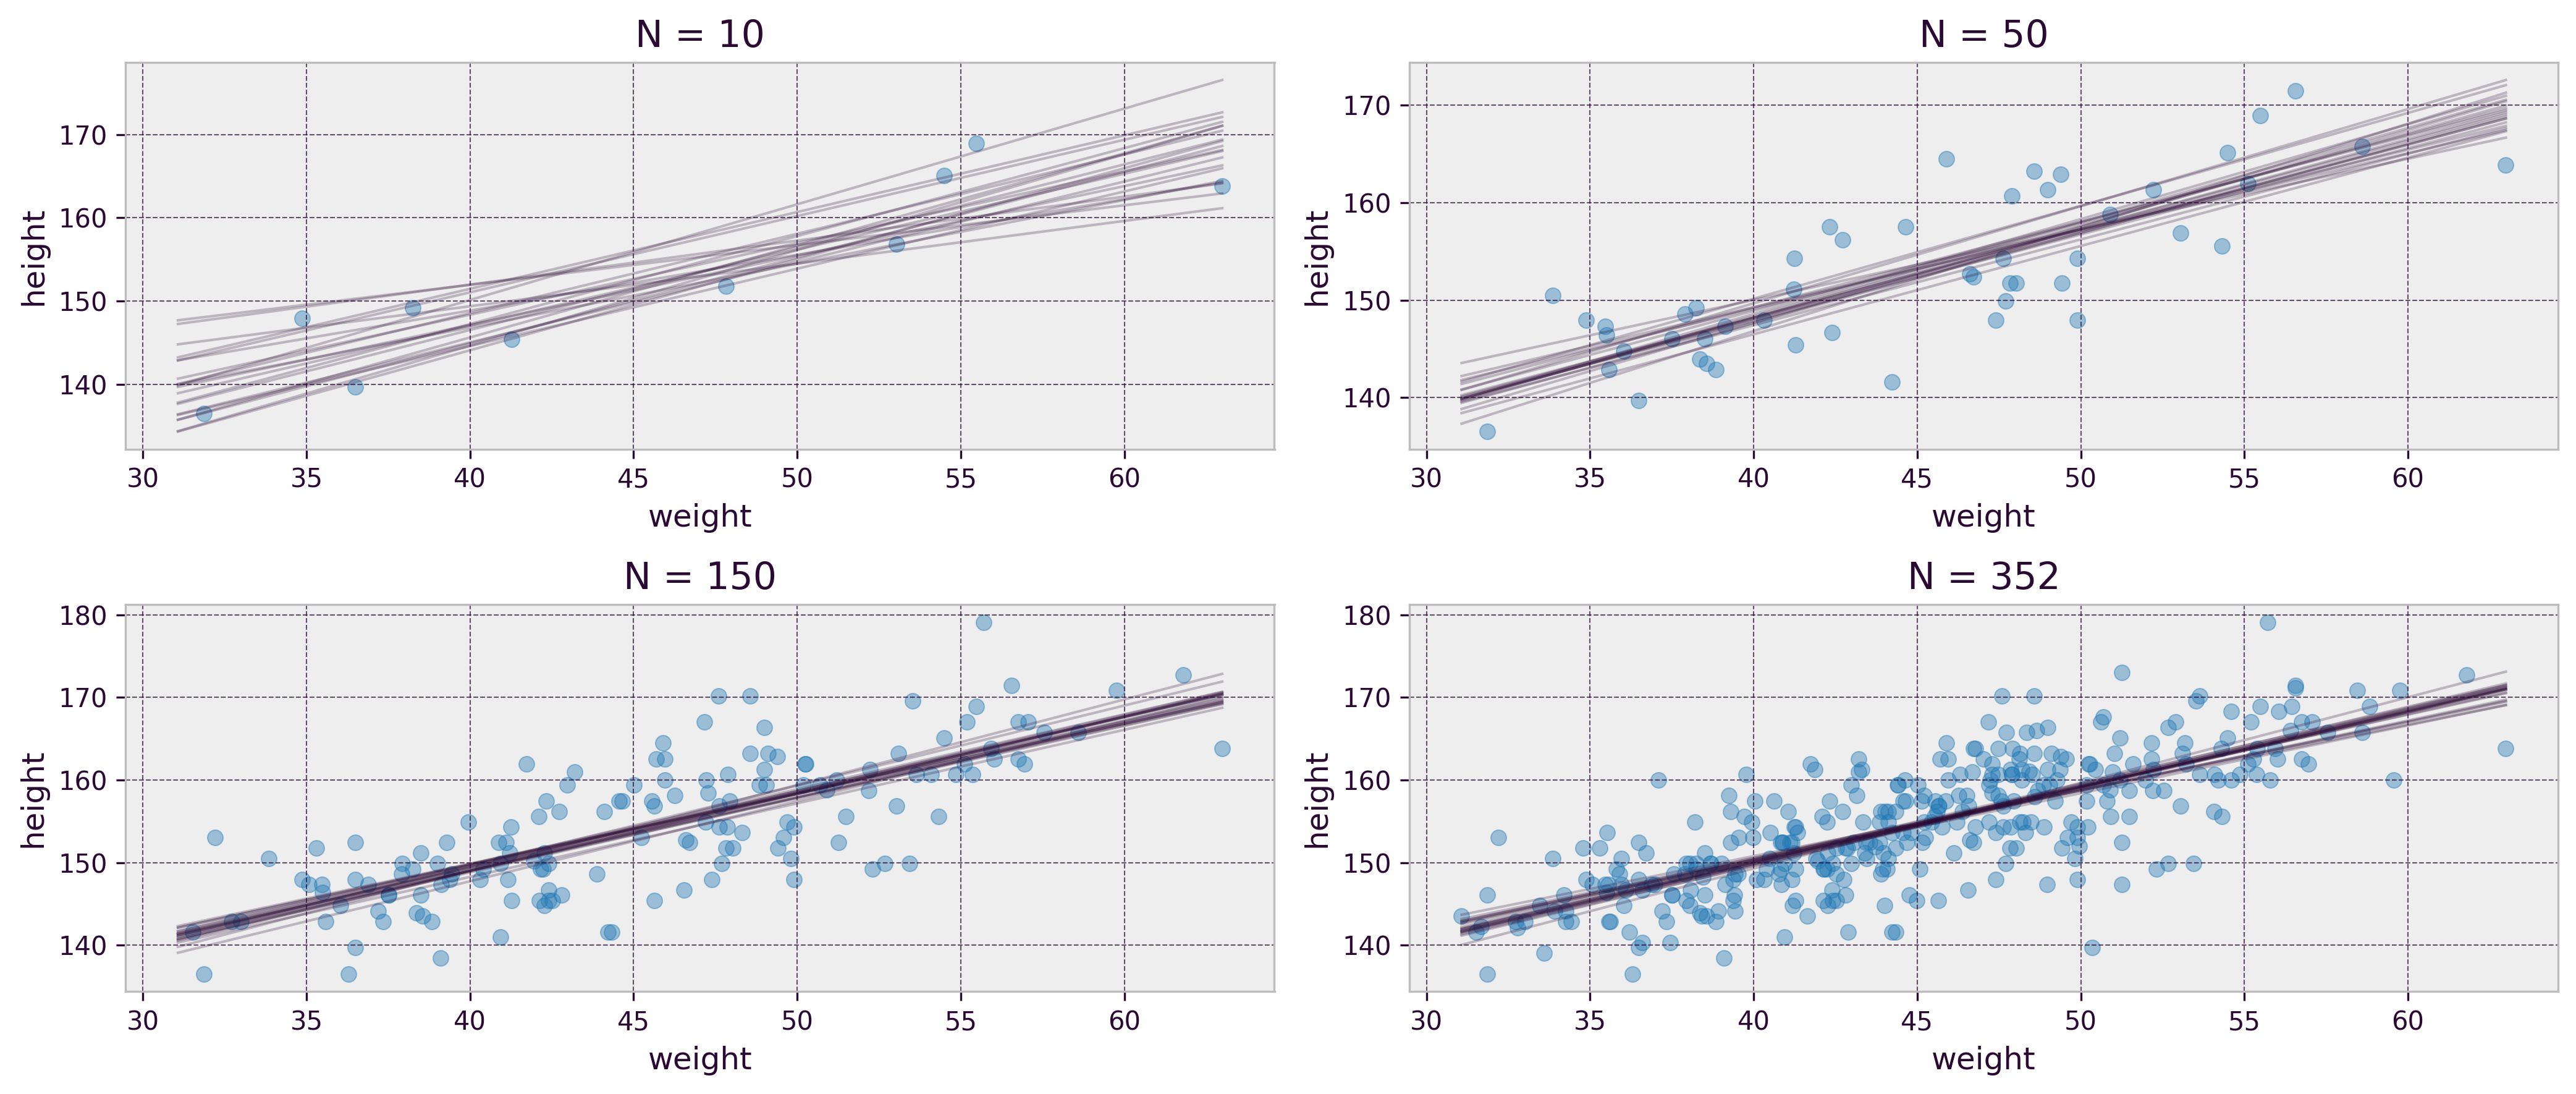

In [23]:
fits = [None]*4

enns = [10, 50, 150, 352]
for i, N in enumerate(enns):
    d_dict = {
        "N": N,
        "height": d2['height'].tolist()[0:N],
        "weight": d2['weight'].tolist()[0:N]}
    fits[i] = sm.sampling(data=d_dict, chains=4, n_jobs=4, refresh = 0)

fig, ax = plt.subplots(figsize = (14, 6), nrows = 2, ncols = 2)

k = 0
xseq = np.linspace(min(d2['weight']), max(d2['weight']), 1000)
for i in [0, 1]:
    for j in [0, 1]:
        post = fits[k].extract(['alpha', 'beta'])
        p_alpha = post['alpha'][0:20]
        p_beta = post['beta'][0:20]
        x = d2['weight'][0:enns[k]]
        y = d2['height'][0:enns[k]]
        
        ax[i, j].scatter(x, y, alpha = .4)
        ax[i, j].set_xlabel("weight")
        ax[i, j].set_ylabel("height")
        ax[i, j].set_title(f"N = {enns[k]}")
        for l in range(20):
            y = p_alpha[l] + p_beta[l] * (xseq - np.mean(x)) 
            ax[i, j].plot(xseq, y, color = COLOR, alpha = .25, linewidth=1)
        k = k + 1
plt.tight_layout()
plt.show()

Rather than plotting sample fits from the posterior, we can select a credible interval in the posterior and shade our confidence in.